In [1]:
library("visualizeR")

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [2]:
library("transformeR")

In [5]:
load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata', verbose=TRUE)

Loading objects:
  ba.merge


In [6]:
length(ba.merge$Data)
length(ba.merge$xyCoords$x)
length(ba.merge$xyCoords$y)

[1] 265420800

[1] 1440

[1] 720

In [7]:
###
df = expand.grid(ba.merge$xyCoords$y, ba.merge$xyCoords$x)[2:1]
names(df) <- c('x','y')

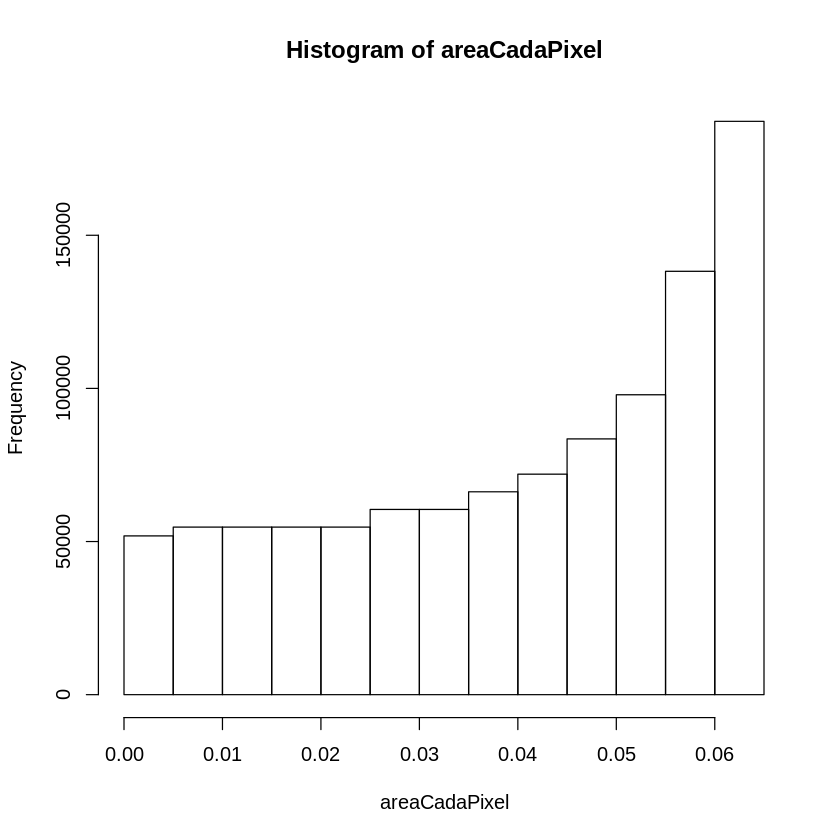

In [8]:
areaCadaPixel <- cos(df$y*pi/180)*0.25*0.25
hist(areaCadaPixel)

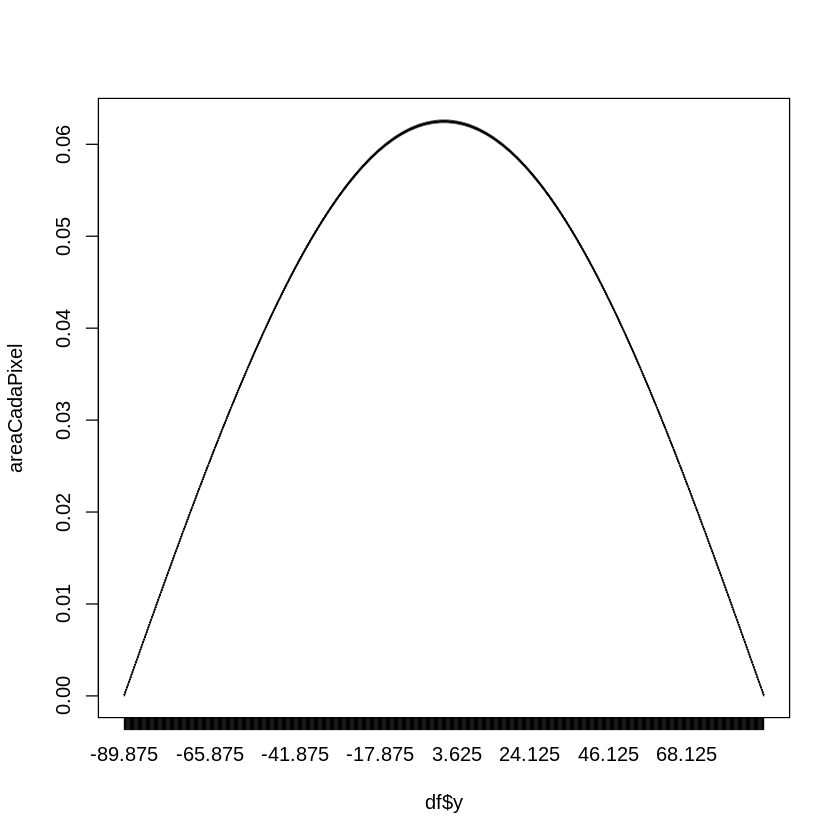

In [9]:
boxplot(areaCadaPixel~df$y)

In [10]:
mat2d = matrix(areaCadaPixel,nrow = 1)
dim(mat2d)

[1]       1 1036800

In [11]:
array3d <- mat2Dto3Darray(mat2d, getCoordinates(ba.merge)$x,getCoordinates(ba.merge)$y)

In [12]:
str(array3d)

 num [1, 1:720, 1:1440] 0.000136 0.000409 0.000682 0.000954 0.001227 ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"


In [13]:
SuperficiePorPixel  <- ba.merge 

In [14]:
SuperficiePorPixel $Data <- array3d

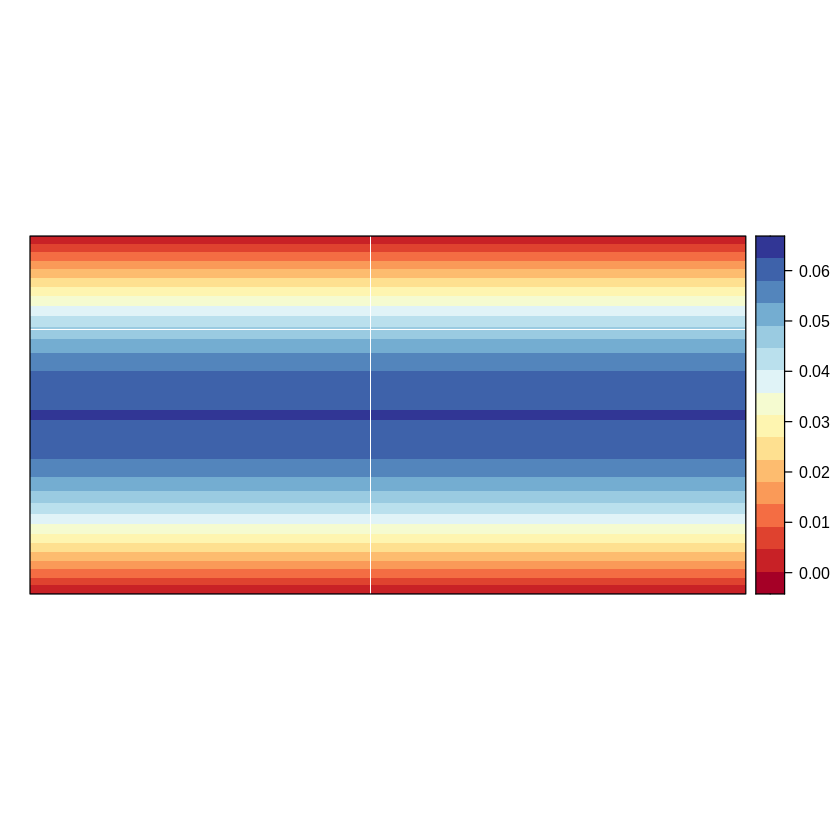

In [15]:
SuperficiePorPixelplot <- spatialPlot(SuperficiePorPixel)
SuperficiePorPixelplot

In [16]:
plotname <- "SuperficiePorPixel.pdf"
pdf(plotname)
SuperficiePorPixelplot
dev.off()

png 
  2

In [16]:
#Reatraibuimos el nombre de las variables de dentro:
SuperficiePorPixel$Variable$varName <- "SuperficiePorPixel"
attr(SuperficiePorPixel,"description") <- "weighted pixel area"

In [18]:
save(SuperficiePorPixel , file = "grid_SuperficiePorPixel.Rdata")

In [98]:
plotname <- 'clims_ba_mapa.pdf'
pdf(plotname)
ba_05.clim_plot
ba_1.clim_plot
ba_15.clim_plot
ba_2.clim_plot
ba_25.clim_plot
ba_3.clim_plot
ba_5.clim_plot
dev.off()

png 
  2